# Stellar spectra    A. Basic Line Formation  


**Nils-Ole Stutzer**

***Instructions*** *This is the template for submitting SSA. Please update your name or student identifier above. Before you submit, make sure you delete all the markdown cells with text in italic (such as these instructions). Do not delete the questions themselves. Write your answers in the cells below the questions. While only one empty cell appears before the question blocks, feel free to add any quantity of cells (code or Markdown) in the order and quantity you see fit. You can also modify the header below to suit your needs, but please don't use any non-standard packages and do not load external code. The whole notebook must run without any errors in the code. In this first experiment with notebooks, there are no page / text limits. But please write concisely, and try to keep it short!*

In [8]:
%matplotlib inline

import numpy
import matplotlib.pyplot as plt
from cycler import cycler
from matplotlib import cm
from astropy import units
from astropy import constants
from astropy.visualization import quantity_support
from astropy.io import ascii
from IPython.display import set_matplotlib_formats

quantity_support()
set_matplotlib_formats('svg')
plt.rc('legend', frameon=False)

## 1. Saha-Boltzmann calibration of the Harvard sequence ("Cecilia Payne")

## 1.1 Payne’s line strength diagram

## 1.2 The Boltzmann and Saha laws

* Inspect the hydrogen energy level diagram in section 1.2. Which transitions correspond to the hydrogen lines in the image with stellar spectrograms (section 1)? Which transitions share lower levels and which share upper levels?

* Payne's basic assumption was that the strength of the absorption lines observed in stellar spectra scales with the population density of the lower level of the corresponding transition. Why would she think so? (It is not correct, but generally stellar absorption lines do get stronger at larger lower-level population. In this exercise we follow her example and assume that the scaling is linear.)

* Use this expectation to give initial rough estimates of the strength ratios of the $\alpha$ lines in the the H I Lyman, Balmer, Paschen and Brackett series.


_Answers to first point_: 
* If we take a look at the hydrogen energy level diagram we can see that the Balmer lines (H + greek letter) are the only ones having the right wavelengths to appear in the stellar spectrum in section 1. The Lyman lines have a smaller wavelength, and the Paschen and Bracket lines have too large wavelengths to appear in the spectrogram. Thus the only hydrogen lines we can see are the H$\beta$, H$\gamma$, H$\delta$ and H$\epsilon$ lines. However, the H$\gamma$, H$\delta$ and H$\epsilon$ lines are not drawn in the level diagram, but they are still there. All the Balmer lines share the same lower level at $s = 2$ . However there are no Balmer lines sharing a common upper level with other lines (such as Lyman lines) since they are not in the wavelength interval of the spectrogram.

_Answer to second point_:
* Assuming we have a gas with a certain population density of a specific state of some atom. If the population density is high, it is somewhat natural to assume that there is a higher likelihood for electrons in that energy state to be exited by incoming photons. If there are more targets, the likelihood of hitting one is of course higher, one would think. This is of course not strictly true, as the line strength is dependent on multiple other factors.

_Answer to third point_:
* According to Payne's basic assumption the strength of an absorption line observed in the stellar spectra is about propotional to the lower energy level population of the corresponding transition. Meaning 
$$
n_{r,s} \propto \text{line strength}, 
$$
where we let the ionisation level $r = 1$ and the lower energy state index of the transition be denoted by $s$. We want to find out roughly which of the $\alpha$ lines n the HI Lyman, Balmer, Paschen and Bracket series is the stronges, using Payne's assumption. We do this by dividing the Boltzmann equation corresponding a transition with lower level $s$ by the Boltzmann equation corresponding to a different transition with lower level $t$. This way we eliminate the partition function $U_r$ and the total particle density of all levels of ionisation $N_r$, since they are the same for both tansitions. Thus
$$
\frac{n_{1,s}/N_1}{n_{1,t}/N_r} = \frac{n_{1,s}}{n_{1,t}}
= \frac{g_{1,s}e^{-\chi_{1,s}/k_BT}}{g_{1,t}e^{-\chi_{1,t}/k_BT}},
$$
gives an estiamte of which population density is the highest of two transitions, and through Payne's assumption which line should be the strongest. The statistical weights $g_{1,s} = 2s^2$ and the exititation energy of a level $s$ measured from the ground state is $\chi_{1,s} = 13.598(1-\frac{1}{s^2})$eV, where $s = 1, 2, 3, \ldots$. Below we have written a short script calulation these ratios for the four lines of intrest.

In [9]:
g   = lambda s: 2 * s ** 2
chi = lambda s: 13.598 * (1 - 1 / s ** 2) * units.eV

"""For neutral hydrogen r = 1:"""
n = lambda s, T: g(s) * numpy.exp(-chi(s) / (constants.k_B * T))

T         = 5000 * units.K
s         = numpy.arange(1, 5, 1)
n_arr     = n(s, T)
lines     = numpy.array(["Ly a", "Ba a", "Pa a", "Br a"])

for i in range(4):
    for j in range(4):
        if i != j and i < j:
            ratio = n(s[i], T) / n(s[j], T)
            print("%s / %s: n_%d / n_%d = %g" 
                  %(lines[i], lines[j], s[i], s[j], ratio))


Ly a / Ba a: n_1 / n_2 = 4.75969e+09
Ly a / Pa a: n_1 / n_3 = 1.69447e+11
Ly a / Br a: n_1 / n_4 = 4.42007e+11
Ba a / Pa a: n_2 / n_3 = 35.6004
Ba a / Br a: n_2 / n_4 = 92.8645
Pa a / Br a: n_3 / n_4 = 2.60853


We can from the above program printout see that the lines are ordered as following: (from strong to weak) Ly$\alpha$, Ba$\alpha$, Pa$\alpha$, Br$\alpha$. Of course this is only a rough estimate, and it is important to note that the exact transition ($\alpha$ lines) does not go into this ratio, as we have not taken ino account the upper level of the $\alpha$ transition. Thus these ratios tell us about the relation between the line strengths of the Lyman, Balmer, Paschen an Bracket series as a whole. This would of course be way to easy to be true.

* Explain from equations (1) and (3) why the Saha and Boltzmann distributions behave differently for increasing temperature.
* Speculate how ionisation can fully deplete a stage while excitation puts only a few atoms in levels just below the ionisation level. Hint: what is the limit of the Saha and Boltzman ratios for infinite temperature?

_Answer to first point_:
The temperature dependence in the Boltzmann and Saha laws are not that easy to grasp, as they not only are explisitly temperature dependent, but also implisitly through the partition function. But at high temperatures we see that the exponential factor $\sim e^{-1/T}$ inside $U_r$ drops towards one very fast for increasing $T$. Therefore we can basically neglect it. The same will of course happen for the exponential factor $\sim e^{-1/T}$ in the Boltzmann law leading to $n_{r,s} / N_r \to g_{r,s} / U_r$ as the exponential factor drops to one for $T\to \infty$. In other words $n_{r,s} / N_r$ will start of growing for low temerature, but gradually flatten out as the temperature gets higher. 

The partition functions in the Saha law will also be approximatelly constant for high $T$, therewhile it is dependent explisitly on $\sim T^{3/2}e^{-1/T}$. For increasing $T$ the $e^{-1/T}$ will drop to one quickly as discussed earlier, while the $T^{3/2}$ increases for increasing $T$. Therefore the Saha law $N_{r+1}/N_r\to \infty$ grows as the temperature increases.

_Answer to second point_:
Let us first take a look at what happens to the Boltzmann law when $T\to \infty$. Then $e^{-\chi_{r,s}/k_BT}\to 1$ as $T\to \infty$, giving a ratio 
$$
\frac{n_{r,s}}{N_r} = \frac{g_{r,s}}{U_r} = \frac{g_{r,s}}{\sum_s g_{r,s}}.
$$
If we consider the l.h.s. we see that $\frac{g_{r,s}}{\sum_s g_{r,s}}\ll 1$ since the sum contains the nominator and infinitly many other value that increas with the exitiation level $s$. Thus the r.h.s. must also be much smaller than one. In case we consider a high $s$ just below ionisation, the ration $\frac{n_{r,s}}{N_r}$ will be at its biggest. The level with the highest population compared to all the others is just bellow ionisation, however, the population is still tiny compared to the combined population $N_r$. Thus exitation at $T\to\infty$ may only result in a few atoms just bellow the ionisation.

Next let us consider the Saha law at $T\to\infty$. The partition function will again reduce to a sum over the statistical weights $g_{r,s}$ as $e^{-\chi_{r,s}/k_BT}\to1$ for high temperatures. Combining all constants in $K$ we get that Sahas law at high $T$ as 
$$
\frac{N_{r+1}}{N_r} = K T^{3/2}.
$$
This ratio obviously goes to infinity, meaning that $N_{r+1} \gg N_r$. If this happens the number density of atoms inised to $r+1$ is infinitly greater than the number densiy of atoms with ionisation $r$. There are thus basically no more atoms at ionisation $r$, the atoms are depleted.


## 1.3 Saha-Boltzmann populations of a simplified Ca atom

### 1.3.1 Partition function 

### 1.3.2 Compute the level populations according to the Boltzmann law

### 1.3.3 Compute the ionisation fractions according to the Saha law

### 1.3.4 Put things on an atom class

* Using the simplified Ca atom (`Ca_atom.txt`), compute the partition functions $U_r$ for T=5000, 10000, and 20000 K. What can you say about the temperature dependence of $U_r$?

* Plot a "Payne curve" for the simplified Ca atom using the same temperature range (100 - 175.000 K) and electron pressure (100 Pa)

* Make a separate figure with a Payne curve for an element of your choice. You can choose one of the existing model atoms, or you can use the [NIST atomic spectra database](https://physics.nist.gov/PhysRefData/ASD/levels_form.html) to build a model for any atom you'd like. How does it compare with Ca?

In order to compute the partion functions $U_r$ we use the provided `Atom`-class. We simply import the stage energies, statistical weights and stage levels from the `Ca_atom.txt`-file. 

In [10]:
class Atom:
    """
    Reads atomic data, calculates level populations according to Boltzmann's law,
    and ionisation fractions according to Saha's law.
    """
    
    def __init__(self, atomfile=None):
        """
        Parameters
        ----------
        atomfile : string, optional
            Name of file with atomic data. If not present, atomic data needs
            to be loaded with the .read_atom method.
        """
        self.loaded = False
        if atomfile:
            self.read_atom(atomfile)
        
    def read_atom(self, filename):
        """
        Reads atom structure from text file.
        
        Parameters
        ----------
        filename: string
            Name of file with atomic data.
        """
        tmp = numpy.loadtxt(filename, unpack=True)
        self.n_stages = int(tmp[2].max()) + 1
        # Get maximum number of levels in any stage
        self.max_levels = 0
        for i in range(self.n_stages):
            self.max_levels = max(self.max_levels, (tmp[2] == i).sum())
        # Populate level energies and statistical weights
        # Use a square array filled with NaNs for non-existing levels
        chi = numpy.empty((self.n_stages, self.max_levels))
        chi.fill(numpy.nan)
        self.g = numpy.copy(chi)
        for i in range(self.n_stages):
            nlevels = (tmp[2] == i).sum()
            chi[i, :nlevels] = tmp[0][tmp[2] == i]
            self.g[i, :nlevels] = tmp[1][tmp[2] == i]
        # Put units, convert from cm-1 to Joule
        chi = (chi / units.cm).to('aJ', equivalencies=units.spectral())
        # Save ionisation energies, saved as energy of first level in each stage
        self.chi_ion = chi[:, 0].copy()
        # Save level energies relative to ground level in each stage
        self.chi = chi - self.chi_ion[:, numpy.newaxis]
        self.loaded = True
        
    def compute_partition_function(self, temperature):
        """
        Computes partition functions using the atomic level energies and
        statistical weights.
        
        Parameters
        ----------
        temperature: astropy.units.quantity (scalar or array)
            Gas temperature in units of K or equivalent.
        """
        if not self.loaded:
            raise ValueError("Missing atom structure, please load atom with read_atom()")
        temp = temperature[numpy.newaxis, numpy.newaxis]  # to allow broadcast
        return numpy.nansum(self.g[..., numpy.newaxis] * 
                            numpy.exp(-self.chi[..., numpy.newaxis] / 
                                      constants.k_B / temp), axis=1)
    
    def compute_excitation(self, temperature):
        """
        Computes the level populations relative to the ground state,
        according to the Boltzmann law.
        
        Parameters
        ----------
        temperature: astropy.units.quantity (scalar or array)
            Gas temperature in units of K or equivalent.
        """
        pfunc = self.compute_partition_function(temperature)
        # Reshape arrays to allow broadcast
        temp = temperature[numpy.newaxis, numpy.newaxis]
        g_ratio = self.g[..., numpy.newaxis] / pfunc[:, numpy.newaxis]  # relative to total number of atoms in this stage
        chi = self.chi[..., numpy.newaxis]
        return g_ratio * numpy.exp(-chi / (constants.k_B * temp))
    
    def compute_ionisation(self, temperature, electron_pressure):
        """
        Computes ionisation fractions according to the Saha law.
        
        Parameters
        ----------
        temperature: astropy.units.quantity (scalar or array)
            Gas temperature in units of K or equivalent.
        electron_pressure: astropy.units.quantity (scalar)
            Electron pressure in units of Pa or equivalent.
        """
        partition_function = self.compute_partition_function(temperature)
        electron_density = electron_pressure / (constants.k_B * temperature)
        saha_const = ((2 * numpy.pi * constants.m_e * constants.k_B * temperature) / 
                      (constants.h ** 2)) ** (3 / 2)
        nstage = numpy.zeros_like(partition_function) / units.m ** 3
        nstage[0] = 1. / units.m ** 3
        # Below we use the values for ionisation energies that are saved
        # in the first index of each excited state: self.chi[r + 1, 0]
        for r in range(self.n_stages - 1):
            nstage[r + 1] = (nstage[r] / electron_density * 2 * saha_const *
                             partition_function[r + 1] / partition_function[r] * 
                             numpy.exp(-self.chi_ion[r + 1, numpy.newaxis] / 
                                       (constants.k_B * temperature[numpy.newaxis])))
        # nansum is needed because the last stage might have only one level
        # (only ionisation potential)
        return nstage / numpy.nansum(nstage, axis=0)

    def compute_populations(self, temperature, electron_pressure):
        """
        Computes relative level populations for all levels and all
        ionisation stages using the Bolzmann and Saha laws.
        
        Parameters
        ----------
        temperature: astropy.units.quantity (scalar or array)
            Gas temperature in units of K or equivalent.
        electron_pressure: astropy.units.quantity (scalar)
            Electron pressure in units of Pa or equivalent.
        """
        return (self.compute_excitation(temperature) * 
                self.compute_ionisation(temperature, electron_pressure)[:, numpy.newaxis])

    def plot_payne(self, temperature, electron_pressure):
        """
        Plots the Payne curves for the current atom.
        
        Parameters
        ----------
        temperature: astropy.units.quantity (array)
            Gas temperature in units of K or equivalent.
        electron_pressure: astropy.units.quantity (scalar)
            Electron pressure in units of Pa or equivalent.
        """
        pops = self.compute_populations(temperature, electron_pressure)
        fig, ax = plt.subplots()
        ax.plot(numpy.tile(temperature, (self.n_stages, 1)).T, pops[:, 0].T, 'b-')
        n_levels = self.chi.shape[1]
        if n_levels > 1:
            ax.plot(numpy.tile(temperature, (self.n_stages, 1)).T, pops[:, 1].T, 'r--')
        if n_levels > 2:
            ax.plot(numpy.tile(temperature, (self.n_stages, 1)).T, pops[:, 2].T, 'k:')
        ax.set_yscale('log')
        ax.set_ylim(1e-8, 1.1)
        ax.set_xlabel('Temperature (K)')
        ax.set_ylabel('Populations')

In [11]:
T = numpy.array([5000, 10000, 20000]) * units.K
Ca_atom = Atom("Ca_atom.txt")
Ur_Ca = Ca_atom.compute_partition_function(T)
Ur_Ca

<Quantity [[ 1.16887479,  3.45978054, 13.62723508],
           [ 2.19889031,  3.55230978,  6.70522905],
           [ 1.        ,  1.        ,  1.00001079],
           [ 4.8153548 ,  5.2769924 ,  5.59816828],
           [ 6.91356975,  8.0815264 ,  9.64653602],
           [ 2.        ,  2.        ,  2.        ]]>

Above one can see the partition function for each of the temperatures 5000 K, 10000 K and 20000 K. Since we extract six ionisation stages from the `Ca_atom.txt`-file we obtain six arrays of three elements each (one for each temperature. On the first look it seems as if the partition function simply increases with temperature. However, if we take a look at the expession for the partition function 
$$
U_r = \sum_s g_{r,s}e^{-\chi_{r,s}/k_BT
$$
it becomes clear that the partition function will gradually flatten out for increasing temperatures. That is because the temperature dependence drops away as $T\to\infty$ so that $e^{-\chi_{r,s}/k_BT}\to 1$ making the partition function approach a constant value of $U_r \to \sum_s g_{r,s}$. We can also see this by choosing a finer temperaute grid and plot the partition function for each ionisation stage $r$ as a function of the temperature. This is seen below.

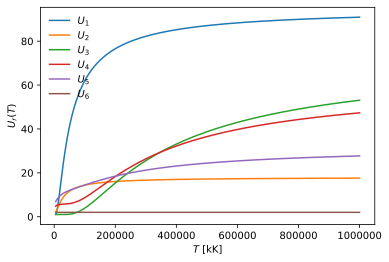

In [12]:
T = numpy.linspace(5000, 1e6, 100000) * units.K
Ur_Ca = Ca_atom.compute_partition_function(T)

fig, ax = plt.subplots()
for r in range(len(Ur_Ca[:,0])):
    ax.plot(T, Ur_Ca[r, :], label = r"$U_%d$" %(r + 1))
ax.set_xlabel(r"$T$ [kK]")    
ax.set_ylabel(r"$U_r(T)$")
plt.legend(loc = 0)

We can clearly see that each partition function starts out growing for each $r$, but flattens out as the temperature increases to high values.

Next, in the following cell a small script calling upon the `Atom`-class is shown, used to plot Payne curves fr both the provided Ca and He atoms. In order to illustrate the levels of the He atom we did some minor changes to the axis scaling in the `Atom`-class. 

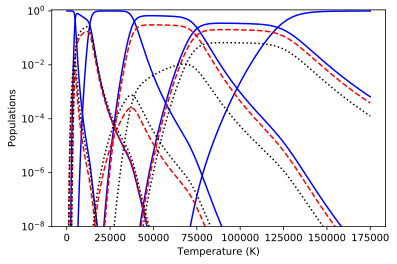

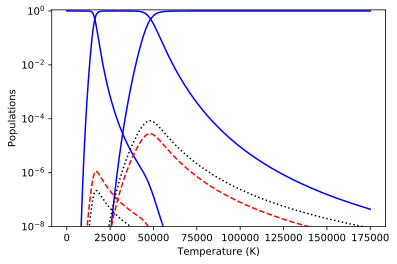

In [13]:
Temp = numpy.linspace(0.1, 175.0, int(1e4)) * 1e3 * units.K
Pres_e = units.Quantity(100, unit = "Pa")

Ca_atom.plot_payne(Temp, Pres_e)

He_atom = Atom("He_atom.txt")
He_atom.plot_payne(Temp, Pres_e)

By running the above code cell we produce two plots; the top-most showing six stages of Ca with corresponding levels, and the bottom-most showing three stages of He with corresponding levels. We can immediately see that the Ca-atom allways has a higher population of atoms in exited states seen by the dotted and dashed lines reaching further up. Also we see that He, only having three stages; He I, He II and HeIII, has all its possible stages represented. Therewhile the Ca atom only shows six (Ca I - Ca V) of its 21 possible stages (which are probably quite hard to find when searching for the higher stages). Another difference to note is that it seems as if He II reaches its population peak at arround 25 kK, while at the same temperature Ca III also reaches its population peak. This may suggest that it is a bit easier to ionize Ca one stage higher than it is to ionize He to the same stage.

## 1.4 Saha-Boltzmann Populations of Hydrogen

* Using equations (4) and (5), create a model hydrogen atom with 100 levels and save it to a file with the same format. Compute the partition functions for both `H_atom.txt` and your 100-level model. How do they compare?

*Your answer here*

In [14]:
T = numpy.array([5000, 10000, 20000]) * units.K
s = numpy.arange(1, 102, 1)
r = numpy.zeros_like(s)

r[-1] = 1
chi_arr = chi(s).to("1 / cm", equivalencies = units.spectral())
chi_arr[-1] = (13.598 * units.eV).to("1 / cm", equivalencies = units.spectral())
g_arr = g(s)
g_arr[-1] = 1
s[-1] = 1
ascii.write([chi_arr, g_arr, r, s - 1], "H_model.dat",
            formats = {'# E (cm^-1)': '%10.3f', 'g': '%10.3f', 'stage': '%10.d', 'level': '%10.d'}, 
            names = ['# E (cm^-1)', 'g', 'stage', 'level'], 
            format='fixed_width', bookend = False, delimiter = None)

H_atom = Atom("H_atom.txt")
H_model_100 = Atom("H_model.dat")

Ur_H = H_atom.compute_partition_function(T)
Ur_H_model = H_model_100.compute_partition_function(T)
print("U_r for provided H atom: ")
print(Ur_H)
print("U_r for 100-level H atom: ")
print(Ur_H_model)


U_r for provided H atom: 
[[2.         2.00009774 2.08301843]
 [1.         1.         1.        ]]
U_r for 100-level H atom: 
[[  2.00000001   2.09541736 256.03258146]
 [  1.           1.           1.        ]]


If we calculate and compare the partition functions $U_r$ for the provided Hydrogen atom model data in `H_atom.txt` and the calculated 100-level Hydrogen atom model saved in the `H_model.dat`-file, we see that they behave quite similar for low temperatures. At low temperatures (5000 K) both $U_1 = 2$ and $U_2 = 1$. for each model. However, when incrreasing the temperature to 10000 K we start to notice that $U_1$ remains close to $U_1 \approx 2$ for the provided model and approaches $U_1 = 2.1$ for the calculated level 100-level model. Increasing the temperature even more to 20000 K, we see the differences become very evident. Now the partition function $U_1 \approx 2.1$ for the provided model, while the calculated model results in $U_1 \approx 260$, which is a change in order of magnitude by about 2. The Partition function for the first ionisation stage , however remain at $U_2 = 1$ for both models. To answer why the partition functions for the two neutral hydrogen models behave so differently at high temperaures, we need to take a look at the expression for the partition function again 
$$
U_r = \sum_{s = 1}^{n} g_{r,s} e^{-\chi_{r,s}/k_BT}.
$$
Now, in the provided model we only have five levels in the neutral stage of hydtrogen. Therefore the upper limit of the sum is simply $n=5$, while we have 100 levels in the calculated model giving $n=100$. At temperatures below 10000 K, the exponential factor provides a weight for the $g_{r,s}$'s in such a way that they fall of quickly as $s$ increases, making the first few terms dominant. Since the first terms are the same in both models the sum will of course be close to equal. If we look at high temperaures, like 20000 K or more, $e^{-\chi_{r,s}/k_BT}\to 1$ because the $\chi_{r,s}$'s can at most approach 13.598 eV while the temperaure is still high. As also discussed earlier we loose the temperature dependence at high $T$, so that $U_r\to\sum_s g_{r,s}$. Because we have 5 elements in the provided model and 100 elements in the calculated model, it is no wonder that the calculated model results in a higher partition function for high temperatures. Therewhile, since we in bth models only have one level for the ionisation state of hydrogen, the partition function for each model will always be equal, for any temperaure. 

## 1.5 Solar Ca$^+$K versus H$\alpha$: line strength

* Explain qualitatively why the solar Ca$^+$ K line is much stronger than the solar H$\alpha$ line, even though hydrogen is not ionised in the solar photosphere and low chromosphere ($T \approx$ 4000 - 6000 K) where these lines are formed, and even though the solar Ca/H abundance ratio is only $N_\mathrm{Ca}/N_\mathrm{H} = 2 \times 10^{−6}$. Assume again that the observed line strength scales with the lower-level population density (which it does, although nonlinearly through a "curve of growth" as you will see in an exercise below).

* Prove your explanation by computing and plotting the expected strength ratio of these two lines as function of temperature for $P_e = 10^2$ dyne cm$^{-2}$. Make use of `H_atom.txt` and `Ca_atom.txt`.


If we assume Paynes assumption is true, the relative line strength of Ca$^+$ K with respect to the H$\alpha$ line should scale about propotionally to the ration between the populations of the lower level of the two transitions. However we also need to take the abundance ratio into account, as there is way more hydrogen in the sun than Ca. The relative line strength is the $\frac{n_{Ca^+K}N_{Ca}}{n_{H\alpha}N_{H}} = \frac{n_{Ca^+K}}{n_{H\alpha}} \cdot 2\cdot 10^{-6}$, where we multiply each lower level population with the total number density of the corresponding atom (at any ionisation stage). Now we see that this realtive line strength will depend strongly on the population ratio, if this ratio is greater than the relative abundance $2\cdot10^{6}$, the Ca$^+$K line will be stronger than the H$\alpha$ line. So assuming this is the case the Ca$^+$ K line is stronger than the H$\alpha$ line eventhough the Ca abundance is very low.

Text(0, 0.5, 'Realtive line strength ratio')

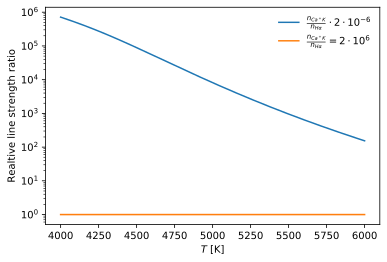

In [22]:
T = numpy.linspace(4000, 6000, 1000) * units.K
P_e = (100 * units.dyne / units.cm ** 2).to("Pa")
Ca_pops = Ca_atom.compute_populations(T, P_e)
H_pops = H_atom.compute_populations(T, P_e)
rel_abund = 2e-6
rel_line_strength = Ca_pops[1, 0] / H_pops[0, 1] * rel_abund
plt.semilogy(T, rel_line_strength, label = r"$\frac{n_{Ca^+K}}{n_{H\alpha}}\cdot2\cdot10^{-6}$")
plt.semilogy(T, numpy.ones_like(T) / units.K, label = r"$\frac{n_{Ca^+K}}{n_{H\alpha}}=2\cdot10^{6}$")
plt.legend(loc = 0)
plt.xlabel(r"$T$ [K]")
plt.ylabel(r"Realtive line strength ratio")

Now we see that when calculating the quantitiy $\frac{n_{Ca^+K}}{n_{H\alpha}} \cdot 2\cdot 10^{-6}$ representing the relative line strengths of the two lines of intrest as a function of temperrature $T$. We see that for the temperature range 4000 - 6000 K this quantity is always greater than 1 (corresponding to the ratio where the Ca$^+$ K  line is as strong as the H$\alpha$ line), meaning the population ratio is alsways much higher than $\frac{n_{Ca^+K}}{n_{H\alpha}}$ the relative abundance ratio inverse ($2\cdot 10^{6}$)

## 1.6 Solar Ca$^+$K versus H$\alpha$: temperature sensitivity

* Plotting the relative population changes $(\Delta n_\mathrm{Ca} / \Delta T) / n_\mathrm{Ca}$ and $(\Delta n_\mathrm{H} /  \Delta T) / n_\mathrm{H}$ for the lower levels of Ca$^+$K and H$\alpha$, using $\Delta T=$ 1 K.

* Around $T=$ 5600 K the Ca$^+$K curve dips down to very  small values; the H$\alpha$ curve does that around $T=$ 9500  K. Thus, for $T \approx$ 5600 K the temperature sensitivity of Ca$^+$K is much smaller than the temperature sensitivity of H$\alpha$. Each dip has a $\Delta n > 0$ and a $\Delta n < 0$ flank.  Which is which? (The dips can be diagnosed by overplotting the variation with temperature of each population in relative units.) 

* Explain each flank of the two population curves and the dips in the two temperature sensitivity curves.

* Find at which temperature the hydrogen in stellar photospheres with $P_e =$ 10 Pa is about 50% ionised. Plot the neutral and ionised fractions of hydrogen as a function of temperature.

*Your answers here*

## 2. Fraunhofer line strengths and the curve of growth ("Marcel Minnaert")

    
### 2.1 The Planck law

* Plot the Planck function $B_\lambda$ for 100 $< \lambda <$ 2000 nm for a range of temperatures (5000 to 8000 K). Use a log scale for both the x and y axes. Explain the slopes of the righthand part.

*Your answers here*

### 2.2 Radiation through an isothermal layer

* Use equation (11) to calculate the radiation through an isothermal layer. Make plots of $I_\lambda$ for the different values of $I_\lambda(0)$, using the following values:

``` python
b_lambda = 2
tau = numpy.logspace(-2, 1, 100)
i0 = numpy.arange(5)
```
    
* How does $I_\lambda$ depend on $\tau$ for $\tau \ll 1$ when $I_\lambda(0) =0$ (hint: use a log scale in the x and y axes to study the behavior at small $\tau$)?  And when $I_\lambda(0) > B_\lambda$? Such a layer with $\tau \ll 1$ is called "optically thin", why? Would "radiatively thin" be a better name?
 
* A layer is called "optically thick" when it has $\tau \gg 1$. Why? The emergent intensity becomes independent of $\tau$ for large $\tau$. Can you explain why this is so in physical terms? 

*Your answers here*

## 2.3 Spectral lines from a solar reversing layer


### 2.3.1 Schuster-Schwarzschild model

### 2.3.2 Voigt profile

### 2.3.3 Emergent line profiles

* Compute and plot the emergent line profiles using a Schuster-Schwarzschild model, using the code provided. Try changing the parameters (`temp_surface`, `temp_layer`, `a`, `tau0`) to see if you can obtain a saturated line profile (flat bottom). Which parameter(s) are more important in determining this?

* Make a plot of line profiles with different $\tau_0$, using `tau0 = 10 ** numpy.linspace(-2, 2, 9)`. How do you explain the profile shapes for $\tau(0) \ll 1$? Why is there a low-intensity saturation limit for $\tau \gg 1$? Why do the line wings develop only for very large $\tau(0)$? Where do the wings end? For which values of $\tau(0)$ is the layer optically thin, respectively optically thick, at line center? And at $u=5$?

* Now study the dependence of these line profiles on wavelength by repeating the above for $\lambda=$ 200 nm (ultraviolet) and $\lambda=$ 1000 nm (near infrared). What sets the top value $I_{\rm cont}$ and the limit value reached at line center by $I(0)$? Check these values by computing them directly. What happens to these values at other wavelengths?  

* Make a figure with plots for the above: line profiles for several values of $\tau_0$, and the three different wavelengths (200, 500, and 1000 nm). However, normalise each line profile by its continuum intensity: `intensity /= intensity[0]` (observed spectra are usually normalised this way because absolute calibrations are often missing). Explain the wavelength dependencies in this plot.

*Your answers here*

## 2.4 The equivalent width of spectral lines


## 2.5 The curve of growth

* Compute and plot a curve of growth by plotting $W_\lambda$ against $\tau_0$ on a log-log plot. Explain what happens in the three different parts.  

* The first part has slope 1:1, the third part has slope 1:2 in this log-log plot.  Why?

* Which parameter controls the location of the onset of the third part? Give a rough estimate of its value for solar iron lines through comparison with the given figure from Wright (1948).

* Which parameter should you increase to produce emission lines instead of absorption lines? Change it accordingly and modify the code to produce emission profiles and an emission-line curve of growth. (To avoid taking the log of negative $W_\lambda$, plot the absolute value of $W_\lambda$.)

*Your answers here*